In [1]:
import sys,os
__script_path=os.path.abspath(globals().get('__file__','.'))
__script_dir = os.path.dirname(__script_path)
root_dir = os.path.abspath(f'{__script_dir}/../../..')
print(root_dir)
for lib in [root_dir][::-1]:
    if lib in sys.path:
        sys.path.remove(lib)
    sys.path.insert(0,lib)

from libs.common import *
from config.config import *

c:\Users\Admin\Data\ads_fraud_detection


c:/Users/Admin/Data/ads_fraud_detection


# 3. Tiền xử lí dữ liệu

In [2]:
save_dir=f"{exps_dir}/exp3/exp_gan"

save_dir = f"{save_dir}"
os.makedirs(save_dir, exist_ok=True)
test_size=0.33
seed=42

In [3]:
test_size=0.33
seed=42
data=pd.read_excel(f'{exps_dir}/exp3/data_EDA.xlsx')
data

,POLICY_NUMBER,INSURANCE_TYPE,PREMIUM_AMOUNT,CLAIM_AMOUNT,CUSTOMER_NAME,ADDRESS_LINE1,ADDRESS_LINE2,CITY,STATE,POSTAL_CODE,MARITAL_STATUS,AGE,TENURE,EMPLOYMENT_STATUS,NO_OF_FAMILY_MEMBERS,RISK_SEGMENTATION,HOUSE_TYPE,SOCIAL_CLASS,ROUTING_NUMBER,CUSTOMER_EDUCATION_LEVEL,CLAIM_STATUS,INCIDENT_SEVERITY,AUTHORITY_CONTACTED,ANY_INJURY,POLICE_REPORT_AVAILABLE,INCIDENT_STATE,INCIDENT_CITY,INCIDENT_HOUR_OF_THE_DAY,Squared_PREMIUM_AMOUNT,Cubed_PREMIUM_AMOUNT,BoxCox_PREMIUM_AMOUNT,YeoJohnson_PREMIUM_AMOUNT,Quantile_PREMIUM_AMOUNT,Log_CLAIM_AMOUNT,Sqrt_CLAIM_AMOUNT,BoxCox_CLAIM_AMOUNT,YeoJohnson_CLAIM_AMOUNT,Quantile_CLAIM_AMOUNT
0,PLC00008468,Health,157.13,9000,Christopher Demarest,7701 West Saint John Road,#2010,Glendale,AZ,85308,Y,54,89,Y,3,L,Own,LI,109134974,Bachelor,A,Major Loss,Police,0,1,GA,Savannah,4,24689.8369,3.879514e+06,83.202533,86.051521,1.426191,9.104980,94.868330,17.420186,17.388012,0.099274
1,PLC00009594,Property,141.71,26000,Ricardo Gatlin,8595 West 81st Drive,NaN,Arvada,CO,80005,N,61,80,Y,4,L,Rent,MI,40125819,Bachelor,A,Total Loss,Ambulance,1,0,AL,Montgomery,0,20081.7241,2.845781e+06,76.162178,78.762092,1.104066,10.165852,161.245155,21.130810,21.086110,0.795322
2,PLC00007969,Property,157.24,13000,Lashawn Engles,637 Britannia Drive,NaN,Vallejo,CA,94591,N,47,68,Y,6,L,Rent,MI,99513168,PhD,A,Total Loss,Police,0,1,CO,Grand Junction,19,24724.4176,3.887667e+06,83.252356,86.103127,1.429717,9.472705,114.017543,18.648920,18.612722,0.312376
3,PLC00009292,Health,172.87,16000,Steven Bassett,2803 River Drive,NaN,Thunderbolt,GA,31404,Y,36,16,Y,7,L,Mortgage,MI,18429110,Masters,A,Minor Loss,Ambulance,0,0,GA,Savannah,12,29884.0369,5.166053e+06,90.278146,93.383341,1.697425,9.680344,126.491106,19.369101,19.330489,0.445919
4,PLC00000204,Travel,88.53,3000,Jason Rodriguez,7573 National Drive,NaN,Livermore,CA,94550,Y,51,16,Y,2,M,Rent,HI,70752391,Masters,A,Major Loss,Police,0,1,TN,Nashville,18,7837.5609,6.938593e+05,50.830008,52.593071,-0.008884,8.006368,54.772256,14.080117,14.058363,-0.485069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,PLC00007245,Motor,105.75,1000,Patrick Hauman,126 Marjorie Lane,C,Manchester,CT,6042,N,45,98,Y,3,M,Own,MI,89109346,PhD,A,Minor Loss,Ambulance,1,1,CT,Manchester,0,11183.0625,1.182609e+06,59.241996,61.271170,0.382123,6.907755,31.622777,11.184151,11.171343,-0.846279
9996,PLC00002590,Life,64.59,67000,Paula Noel,501 West Maple Street,#203,Fayetteville,AR,72701,Y,52,92,Y,3,L,Mortgage,LI,89666038,Masters,A,Total Loss,Police,1,0,MA,Worcester,6,4171.8681,2.694610e+05,38.684887,40.090643,-0.618164,11.112448,258.843582,24.902098,24.843512,1.558482
9997,PLC00006613,Health,183.50,8000,Luis Clark,10980 Splendor Loop,NaN,Anchorage,AK,99577,Y,53,32,Y,2,M,Mortgage,LI,34475591,Bachelor,A,Major Loss,NaN,1,1,OK,Oklahoma City,12,33672.2500,6.178858e+06,94.999274,98.278448,1.913810,8.987197,89.442719,17.038866,17.007917,0.037646
9998,PLC00001781,Motor,113.46,2000,Ryan Gordon,19 Heritage,NaN,Oakland,CA,94605,Y,61,44,Y,7,M,Rent,MI,59003728,Bachelor,A,Total Loss,Ambulance,0,1,AR,Fayetteville,6,12873.1716,1.460590e+06,62.937057,65.087129,0.515726,7.600902,44.721360,12.962916,12.944559,-0.653377


In [4]:
data.isnull().sum()

POLICY_NUMBER                   0
INSURANCE_TYPE                  0
PREMIUM_AMOUNT                  0
CLAIM_AMOUNT                    0
CUSTOMER_NAME                   0
ADDRESS_LINE1                   0
ADDRESS_LINE2                8505
CITY                           54
STATE                           0
POSTAL_CODE                     0
MARITAL_STATUS                  0
AGE                             0
TENURE                          0
EMPLOYMENT_STATUS               0
NO_OF_FAMILY_MEMBERS            0
RISK_SEGMENTATION               0
HOUSE_TYPE                      0
SOCIAL_CLASS                    0
ROUTING_NUMBER                  0
CUSTOMER_EDUCATION_LEVEL      529
CLAIM_STATUS                    0
INCIDENT_SEVERITY               0
AUTHORITY_CONTACTED          1945
ANY_INJURY                      0
POLICE_REPORT_AVAILABLE         0
INCIDENT_STATE                  0
INCIDENT_CITY                  46
INCIDENT_HOUR_OF_THE_DAY        0
Squared_PREMIUM_AMOUNT          0
Cubed_PREMIUM_

# 4.Chuẩn hóa dữ liệu

In [5]:
numeric_columns=dict(np.load(f'{exps_dir}/exp3/columns_dtype.npz',allow_pickle=True))['numeric_columns']
numeric_columns

array(['PREMIUM_AMOUNT', 'CLAIM_AMOUNT', 'POSTAL_CODE', 'AGE', 'TENURE',
       'ROUTING_NUMBER', 'Squared_PREMIUM_AMOUNT', 'Cubed_PREMIUM_AMOUNT',
       'BoxCox_PREMIUM_AMOUNT', 'YeoJohnson_PREMIUM_AMOUNT',
       'Quantile_PREMIUM_AMOUNT', 'Log_CLAIM_AMOUNT', 'Sqrt_CLAIM_AMOUNT',
       'BoxCox_CLAIM_AMOUNT', 'YeoJohnson_CLAIM_AMOUNT',
       'Quantile_CLAIM_AMOUNT'], dtype='<U25')

In [6]:
category_columns=dict(np.load(f'{exps_dir}/exp3/columns_dtype.npz',allow_pickle=True))['category_columns']
category_columns

array(['POLICY_NUMBER', 'INSURANCE_TYPE', 'CUSTOMER_NAME',
       'ADDRESS_LINE1', 'ADDRESS_LINE2', 'CITY', 'STATE',
       'MARITAL_STATUS', 'EMPLOYMENT_STATUS', 'NO_OF_FAMILY_MEMBERS',
       'RISK_SEGMENTATION', 'HOUSE_TYPE', 'SOCIAL_CLASS',
       'CUSTOMER_EDUCATION_LEVEL', 'CLAIM_STATUS', 'INCIDENT_SEVERITY',
       'AUTHORITY_CONTACTED', 'ANY_INJURY', 'POLICE_REPORT_AVAILABLE',
       'INCIDENT_STATE', 'INCIDENT_CITY', 'INCIDENT_HOUR_OF_THE_DAY'],
      dtype='<U24')

In [7]:
data_train, data_test = train_test_split(data, test_size = 0.33, random_state=seed)
print(data_train.shape,data_test.shape)
# data_train.to_excel(f'{save_dir}/datatrain.xlsx', index=None)
# data_test.to_excel(f'{save_dir}/datatest.xlsx', index=None)

(6700, 38) (3300, 38)


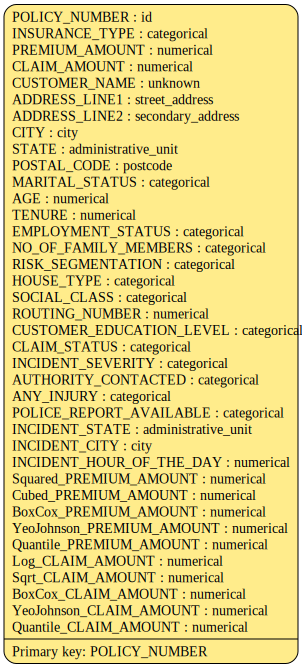

In [8]:
from sdv.metadata import SingleTableMetadata
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=data_train)
metadata.visualize()

In [9]:
data

,POLICY_NUMBER,INSURANCE_TYPE,PREMIUM_AMOUNT,CLAIM_AMOUNT,CUSTOMER_NAME,ADDRESS_LINE1,ADDRESS_LINE2,CITY,STATE,POSTAL_CODE,MARITAL_STATUS,AGE,TENURE,EMPLOYMENT_STATUS,NO_OF_FAMILY_MEMBERS,RISK_SEGMENTATION,HOUSE_TYPE,SOCIAL_CLASS,ROUTING_NUMBER,CUSTOMER_EDUCATION_LEVEL,CLAIM_STATUS,INCIDENT_SEVERITY,AUTHORITY_CONTACTED,ANY_INJURY,POLICE_REPORT_AVAILABLE,INCIDENT_STATE,INCIDENT_CITY,INCIDENT_HOUR_OF_THE_DAY,Squared_PREMIUM_AMOUNT,Cubed_PREMIUM_AMOUNT,BoxCox_PREMIUM_AMOUNT,YeoJohnson_PREMIUM_AMOUNT,Quantile_PREMIUM_AMOUNT,Log_CLAIM_AMOUNT,Sqrt_CLAIM_AMOUNT,BoxCox_CLAIM_AMOUNT,YeoJohnson_CLAIM_AMOUNT,Quantile_CLAIM_AMOUNT
0,PLC00008468,Health,157.13,9000,Christopher Demarest,7701 West Saint John Road,#2010,Glendale,AZ,85308,Y,54,89,Y,3,L,Own,LI,109134974,Bachelor,A,Major Loss,Police,0,1,GA,Savannah,4,24689.8369,3.879514e+06,83.202533,86.051521,1.426191,9.104980,94.868330,17.420186,17.388012,0.099274
1,PLC00009594,Property,141.71,26000,Ricardo Gatlin,8595 West 81st Drive,NaN,Arvada,CO,80005,N,61,80,Y,4,L,Rent,MI,40125819,Bachelor,A,Total Loss,Ambulance,1,0,AL,Montgomery,0,20081.7241,2.845781e+06,76.162178,78.762092,1.104066,10.165852,161.245155,21.130810,21.086110,0.795322
2,PLC00007969,Property,157.24,13000,Lashawn Engles,637 Britannia Drive,NaN,Vallejo,CA,94591,N,47,68,Y,6,L,Rent,MI,99513168,PhD,A,Total Loss,Police,0,1,CO,Grand Junction,19,24724.4176,3.887667e+06,83.252356,86.103127,1.429717,9.472705,114.017543,18.648920,18.612722,0.312376
3,PLC00009292,Health,172.87,16000,Steven Bassett,2803 River Drive,NaN,Thunderbolt,GA,31404,Y,36,16,Y,7,L,Mortgage,MI,18429110,Masters,A,Minor Loss,Ambulance,0,0,GA,Savannah,12,29884.0369,5.166053e+06,90.278146,93.383341,1.697425,9.680344,126.491106,19.369101,19.330489,0.445919
4,PLC00000204,Travel,88.53,3000,Jason Rodriguez,7573 National Drive,NaN,Livermore,CA,94550,Y,51,16,Y,2,M,Rent,HI,70752391,Masters,A,Major Loss,Police,0,1,TN,Nashville,18,7837.5609,6.938593e+05,50.830008,52.593071,-0.008884,8.006368,54.772256,14.080117,14.058363,-0.485069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,PLC00007245,Motor,105.75,1000,Patrick Hauman,126 Marjorie Lane,C,Manchester,CT,6042,N,45,98,Y,3,M,Own,MI,89109346,PhD,A,Minor Loss,Ambulance,1,1,CT,Manchester,0,11183.0625,1.182609e+06,59.241996,61.271170,0.382123,6.907755,31.622777,11.184151,11.171343,-0.846279
9996,PLC00002590,Life,64.59,67000,Paula Noel,501 West Maple Street,#203,Fayetteville,AR,72701,Y,52,92,Y,3,L,Mortgage,LI,89666038,Masters,A,Total Loss,Police,1,0,MA,Worcester,6,4171.8681,2.694610e+05,38.684887,40.090643,-0.618164,11.112448,258.843582,24.902098,24.843512,1.558482
9997,PLC00006613,Health,183.50,8000,Luis Clark,10980 Splendor Loop,NaN,Anchorage,AK,99577,Y,53,32,Y,2,M,Mortgage,LI,34475591,Bachelor,A,Major Loss,NaN,1,1,OK,Oklahoma City,12,33672.2500,6.178858e+06,94.999274,98.278448,1.913810,8.987197,89.442719,17.038866,17.007917,0.037646
9998,PLC00001781,Motor,113.46,2000,Ryan Gordon,19 Heritage,NaN,Oakland,CA,94605,Y,61,44,Y,7,M,Rent,MI,59003728,Bachelor,A,Total Loss,Ambulance,0,1,AR,Fayetteville,6,12873.1716,1.460590e+06,62.937057,65.087129,0.515726,7.600902,44.721360,12.962916,12.944559,-0.653377


In [10]:
data.columns

Index(['POLICY_NUMBER', 'INSURANCE_TYPE', 'PREMIUM_AMOUNT', 'CLAIM_AMOUNT', 'CUSTOMER_NAME', 'ADDRESS_LINE1', 'ADDRESS_LINE2', 'CITY', 'STATE', 'POSTAL_CODE', 'MARITAL_STATUS', 'AGE', 'TENURE', 'EMPLOYMENT_STATUS', 'NO_OF_FAMILY_MEMBERS', 'RISK_SEGMENTATION', 'HOUSE_TYPE', 'SOCIAL_CLASS', 'ROUTING_NUMBER', 'CUSTOMER_EDUCATION_LEVEL', 'CLAIM_STATUS', 'INCIDENT_SEVERITY', 'AUTHORITY_CONTACTED', 'ANY_INJURY', 'POLICE_REPORT_AVAILABLE', 'INCIDENT_STATE', 'INCIDENT_CITY', 'INCIDENT_HOUR_OF_THE_DAY', 'Squared_PREMIUM_AMOUNT', 'Cubed_PREMIUM_AMOUNT', 'BoxCox_PREMIUM_AMOUNT', 'YeoJohnson_PREMIUM_AMOUNT', 'Quantile_PREMIUM_AMOUNT', 'Log_CLAIM_AMOUNT', 'Sqrt_CLAIM_AMOUNT', 'BoxCox_CLAIM_AMOUNT', 'YeoJohnson_CLAIM_AMOUNT', 'Quantile_CLAIM_AMOUNT'], dtype='object')

In [11]:
data.columns

Index(['POLICY_NUMBER', 'INSURANCE_TYPE', 'PREMIUM_AMOUNT', 'CLAIM_AMOUNT', 'CUSTOMER_NAME', 'ADDRESS_LINE1', 'ADDRESS_LINE2', 'CITY', 'STATE', 'POSTAL_CODE', 'MARITAL_STATUS', 'AGE', 'TENURE', 'EMPLOYMENT_STATUS', 'NO_OF_FAMILY_MEMBERS', 'RISK_SEGMENTATION', 'HOUSE_TYPE', 'SOCIAL_CLASS', 'ROUTING_NUMBER', 'CUSTOMER_EDUCATION_LEVEL', 'CLAIM_STATUS', 'INCIDENT_SEVERITY', 'AUTHORITY_CONTACTED', 'ANY_INJURY', 'POLICE_REPORT_AVAILABLE', 'INCIDENT_STATE', 'INCIDENT_CITY', 'INCIDENT_HOUR_OF_THE_DAY', 'Squared_PREMIUM_AMOUNT', 'Cubed_PREMIUM_AMOUNT', 'BoxCox_PREMIUM_AMOUNT', 'YeoJohnson_PREMIUM_AMOUNT', 'Quantile_PREMIUM_AMOUNT', 'Log_CLAIM_AMOUNT', 'Sqrt_CLAIM_AMOUNT', 'BoxCox_CLAIM_AMOUNT', 'YeoJohnson_CLAIM_AMOUNT', 'Quantile_CLAIM_AMOUNT'], dtype='object')

In [12]:
data.CLAIM_STATUS.value_counts()

CLAIM_STATUS
A    9497
D     503
Name: count, dtype: int64

In [13]:
from sdv.single_table import CopulaGANSynthesizer
model = CopulaGANSynthesizer(
    cuda=True, metadata=metadata, epochs=20)
#     anonymize_fields={
#    'address': 'address',
#    'city': 'incident_city',

#     }

model.fit(data)

In [14]:
data_train.CLAIM_STATUS.value_counts()

CLAIM_STATUS
A    6364
D     336
Name: count, dtype: int64

In [22]:
new_data = model.sample(num_rows=12000)

In [16]:
from sdv.evaluation.single_table import run_diagnostic

diagnostic = run_diagnostic(
    real_data=data_train,
    synthetic_data=new_data,
    metadata=metadata
)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 38/38 [00:00<00:00, 1718.03it/s]|
Data Validity Score: 99.86%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 395.91it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 99.93%



In [17]:
from sdv.evaluation.single_table import evaluate_quality

quality_report=evaluate_quality(real_data=data_train,
    synthetic_data=new_data,
    metadata=metadata)


Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 38/38 [00:00<00:00, 366.88it/s]|
Column Shapes Score: 89.55%

(2/2) Evaluating Column Pair Trends: |██████████| 703/703 [00:01<00:00, 428.72it/s]|
Column Pair Trends Score: 83.18%

Overall Score (Average): 86.37%



In [18]:
quality_report.get_details('Column Shapes')

,Column,Metric,Score
0,INSURANCE_TYPE,TVComplement,0.917985
1,PREMIUM_AMOUNT,KSComplement,0.746260
2,CLAIM_AMOUNT,KSComplement,0.869975
3,MARITAL_STATUS,TVComplement,0.975601
4,AGE,KSComplement,0.876807
5,TENURE,KSComplement,0.968290
6,EMPLOYMENT_STATUS,TVComplement,0.975777
7,NO_OF_FAMILY_MEMBERS,TVComplement,0.952927
8,RISK_SEGMENTATION,TVComplement,0.928342
9,HOUSE_TYPE,TVComplement,0.923063


In [23]:
from sklearn.utils import shuffle
gan_data_fraud=new_data[new_data.CLAIM_STATUS=="D"]
data_train=pd.concat([data_train, gan_data_fraud] , axis=0, ignore_index=True)

data_train=pd.concat([data_train, gan_data_fraud] , axis=0, ignore_index=True)
data_train = shuffle(data_train, random_state=42)
data_train.CLAIM_STATUS.value_counts()



CLAIM_STATUS
A    6364
D    5438
Name: count, dtype: int64

In [39]:
data_train.CLAIM_STATUS.tail

<bound method NDFrame.tail of 7820     A
533      A
10731    D
5026     A
8051     D
        ..
11284    D
5191     A
5390     D
860      D
7270     D
Name: CLAIM_STATUS, Length: 11802, dtype: object>

In [40]:
x_train=data_train.drop('CLAIM_STATUS',axis=1)
y_train=data_train['CLAIM_STATUS']

# x_test=data_test.drop('fraud_reported',axis=1)
# y_test=data_test['fraud_reported']

In [41]:
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i : class_weights[i] for i in range(len(class_weights))}
# np.savez(f'{save_dir}/class_weights_dict.npz', class_weights_dict = class_weights_dict)
class_weights_dict

{0: 0.9272470144563167, 1: 1.0851415961750643}

In [42]:
y_train.value_counts()

CLAIM_STATUS
A    6364
D    5438
Name: count, dtype: int64

In [43]:
x_test=data_test.drop('CLAIM_STATUS',axis=1)
y_test=data_test['CLAIM_STATUS']

In [44]:
category_columns

array(['POLICY_NUMBER', 'INSURANCE_TYPE', 'CUSTOMER_NAME',
       'ADDRESS_LINE1', 'ADDRESS_LINE2', 'CITY', 'STATE',
       'MARITAL_STATUS', 'EMPLOYMENT_STATUS', 'NO_OF_FAMILY_MEMBERS',
       'RISK_SEGMENTATION', 'HOUSE_TYPE', 'SOCIAL_CLASS',
       'CUSTOMER_EDUCATION_LEVEL', 'CLAIM_STATUS', 'INCIDENT_SEVERITY',
       'AUTHORITY_CONTACTED', 'ANY_INJURY', 'POLICE_REPORT_AVAILABLE',
       'INCIDENT_STATE', 'INCIDENT_CITY', 'INCIDENT_HOUR_OF_THE_DAY'],
      dtype='<U24')

In [45]:
label_encoders = {}
for column in category_columns:
    if column=="CLAIM_STATUS":
        continue
    label_encoder = LabelEncoder()
    x_train[column] = label_encoder.fit_transform(x_train[column])
    label_encoders[column] = label_encoder  # Lưu trữ label encoder nếu cần sau này

scaler = StandardScaler()
x_train[numeric_columns] = scaler.fit_transform(x_train[numeric_columns])
x_train

,POLICY_NUMBER,INSURANCE_TYPE,PREMIUM_AMOUNT,CLAIM_AMOUNT,CUSTOMER_NAME,ADDRESS_LINE1,ADDRESS_LINE2,CITY,STATE,POSTAL_CODE,MARITAL_STATUS,AGE,TENURE,EMPLOYMENT_STATUS,NO_OF_FAMILY_MEMBERS,RISK_SEGMENTATION,HOUSE_TYPE,SOCIAL_CLASS,ROUTING_NUMBER,CUSTOMER_EDUCATION_LEVEL,INCIDENT_SEVERITY,AUTHORITY_CONTACTED,ANY_INJURY,POLICE_REPORT_AVAILABLE,INCIDENT_STATE,INCIDENT_CITY,INCIDENT_HOUR_OF_THE_DAY,Squared_PREMIUM_AMOUNT,Cubed_PREMIUM_AMOUNT,BoxCox_PREMIUM_AMOUNT,YeoJohnson_PREMIUM_AMOUNT,Quantile_PREMIUM_AMOUNT,Log_CLAIM_AMOUNT,Sqrt_CLAIM_AMOUNT,BoxCox_CLAIM_AMOUNT,YeoJohnson_CLAIM_AMOUNT,Quantile_CLAIM_AMOUNT
7820,2013,0,1.510020,-0.002008,1769,2753,2,2119,8,1.474091,1,-0.452465,-0.211687,1,2,1,1,2,1.668448,0,1,2,0,0,18,204,13,1.598790,0.927851,1.167455,1.102467,1.320581,0.729075,0.298801,0.857072,0.636629,0.286951
533,70,1,-0.617961,0.717882,4553,2297,591,1316,1,-0.429244,1,-0.956301,0.862812,1,3,0,0,0,-0.168197,0,2,0,0,0,10,1220,17,-0.785162,-0.779798,-0.789854,-0.762014,-0.650457,1.130793,0.972455,1.376273,1.131485,0.679478
10731,8314,4,-0.006981,-0.638526,7596,4948,299,185,42,-0.208714,0,-0.536437,-1.286186,1,2,1,2,2,-0.017970,2,2,0,1,1,39,1366,8,-0.819402,0.343232,-0.290685,1.160576,0.169433,-0.381723,0.913028,-0.116095,0.045910,-0.707896
5026,4046,5,-0.258665,-0.541926,234,3612,591,1316,1,-0.428954,1,-1.376164,-0.032604,1,1,2,2,2,1.257583,0,0,2,1,1,18,2097,14,-0.541864,-0.681274,-0.434714,-0.425090,-0.309966,-0.012093,-0.485193,0.008991,-0.171897,-0.254874
8051,7710,3,-1.592906,-0.658863,7718,1922,591,1341,56,0.278345,1,-1.544109,-0.868325,1,3,2,0,1,0.940607,2,2,0,0,1,11,52,22,-0.484802,-0.676740,-1.744293,-0.889009,0.488238,0.061397,0.616112,-0.473046,-0.705103,0.406645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,8150,3,-0.862753,-0.731347,7851,5336,317,2541,37,-0.121560,1,1.478906,-0.629548,1,4,2,2,2,-0.057968,6,1,2,0,1,23,415,23,0.925738,-0.859254,1.606954,-0.806271,-1.644015,1.209294,-0.680549,-1.624936,1.334730,0.901013
5191,4331,5,0.006804,-0.721898,2548,3254,591,1177,25,-0.295835,1,-1.124246,-1.644352,1,1,1,2,1,0.470626,0,1,0,1,1,18,2097,3,-0.320546,-0.571348,-0.180809,-0.183734,-0.044765,-0.986834,-0.998733,-0.919647,-1.057365,-0.791796
5390,7672,0,-0.659538,-0.478396,7590,3856,591,2601,60,1.551368,1,1.562879,0.206174,1,2,1,1,0,1.083259,0,2,0,1,1,32,1414,1,-0.636481,1.504918,1.340153,0.765041,-2.243509,0.765631,-0.785088,-0.116964,1.852426,-0.361423
860,8840,5,-0.292461,-0.449240,8979,4558,591,896,39,1.131901,1,-1.292191,-0.480312,1,0,1,0,0,0.719951,2,0,0,1,0,38,395,3,2.652800,0.646472,0.498256,0.084988,0.255474,1.063873,-0.653640,0.117627,0.034512,1.683711


In [46]:
y_train

7820     A
533      A
10731    D
5026     A
8051     D
        ..
11284    D
5191     A
5390     D
860      D
7270     D
Name: CLAIM_STATUS, Length: 11802, dtype: object

In [47]:
label_encoder = LabelEncoder()
y_train= label_encoder.fit_transform(y_train)


In [48]:
y_train=pd.DataFrame(y_train, columns=['CLAIM_STATUS'])
y_train

,CLAIM_STATUS
0,0
1,0
2,1
3,0
4,1
...,...
11797,1
11798,0
11799,1
11800,1


In [49]:
x_train.to_excel(f'{save_dir}/x_train.xlsx', index=False)
y_train.to_excel(f'{save_dir}/y_train.xlsx', index=False)

In [ ]:
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i : class_weights[i] for i in range(len(class_weights))}
np.savez(f'{save_dir}/class_weights_dict.npz', class_weights_dict = class_weights_dict)
class_weights_dict


{0: 0.9109050911376493, 1: 1.108413001912046}

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
print(f"+ X_train: {len(x_train)}")
for fold, (train_idx, valid_idx) in enumerate(kfold.split(x_train, y_train)):
    print(f'Fold {fold}: ')
    print(f'+ train_idx: {train_idx}')
    print(f'+ valid_idx: {valid_idx}')
    print(f'+ train / valid: {valid_idx}')
    pass

+ X_train: 11594
Fold 0: 
+ train_idx: [    1     2     4 ... 11590 11591 11593]
+ valid_idx: [    0     3     8 ... 11564 11586 11592]
+ train / valid: [    0     3     8 ... 11564 11586 11592]
Fold 1: 
+ train_idx: [    0     1     2 ... 11590 11591 11592]
+ valid_idx: [   12    17    20 ... 11575 11580 11593]
+ train / valid: [   12    17    20 ... 11575 11580 11593]
Fold 2: 
+ train_idx: [    0     1     2 ... 11591 11592 11593]
+ valid_idx: [   15    26    27 ... 11584 11587 11590]
+ train / valid: [   15    26    27 ... 11584 11587 11590]
Fold 3: 
+ train_idx: [    0     1     3 ... 11591 11592 11593]
+ valid_idx: [    2     6     7 ... 11585 11588 11589]
+ train / valid: [    2     6     7 ... 11585 11588 11589]
Fold 4: 
+ train_idx: [    0     2     3 ... 11590 11592 11593]
+ valid_idx: [    1     4     5 ... 11579 11582 11591]
+ train / valid: [    1     4     5 ... 11579 11582 11591]


In [50]:
object_cols_test=dict(np.load(f'{exps_dir}/exp3/columns_dtype.npz',allow_pickle=True))['category_columns']
numeric_cols_test=dict(np.load(f'{exps_dir}/exp3/columns_dtype.npz',allow_pickle=True))['numeric_columns']
# for column in outliers_list:
#     data_test = remove_outliers_iqr(data_test, column)
# data_test['collision_type'].replace('?',np.nan,inplace=True)
# data_test['collision_type'].fillna(method='ffill',inplace=True)
# data_test[['property_damage','police_report_available']].replace('?','Unknow',inplace=True)
# (data_test=='?').sum()
label_encoders = {}
for column in object_cols_test:
    if column=="CLAIM_STATUS":
        continue
    label_encoder = LabelEncoder()
    x_test[column] = label_encoder.fit_transform(x_test[column])
    label_encoders[column] = label_encoder  # Lưu trữ label encoder nếu cần sau này

scaler = StandardScaler()
x_test[numeric_cols_test] = scaler.fit_transform(x_test[numeric_cols_test])

x_test=data_test.drop('CLAIM_STATUS',axis=1)
y_test=data_test['CLAIM_STATUS']
y_test = label_encoder.fit_transform(y_test)
y_test=pd.DataFrame(y_test, columns=['CLAIM_STATUS'])

data_test.to_excel(f'{save_dir}/df_test_minmax.xlsx', index=False)
x_test.to_excel(f'{save_dir}/x_test.xlsx', index=False)
y_test.to_excel(f'{save_dir}/y_test.xlsx', index=False)